In [148]:
# import dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [149]:
# read the heart_2022_encoded.csv file
heart_2022_cleaned = pd.read_csv('heart_2022_cleaned.csv')
# display the first 5 rows of the dataframe
print(heart_2022_cleaned.head())


  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  27.99     Yes              No     No             4.0   
1           No  30.13     Yes              No     No             0.0   
2           No  31.66     Yes             Yes     No             0.0   
3           No  31.32      No              No     No             5.0   
4           No  33.07      No              No     No             3.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0           0.0          No  Female        65-69  White       No   
1           0.0          No    Male        70-74  White      Yes   
2           0.0         Yes    Male        75-79  White       No   
3           0.0         Yes  Female  80 or older  White       No   
4          15.0          No  Female  80 or older  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        9.0     No            No         No  
1       

In [150]:
# Separate the dataset into two subsets based on the HeartDisease_Yes and HeartDisease_No columns
heart_disease_yes = heart_2022_cleaned[heart_2022_cleaned['HeartDisease'] == 'Yes']
heart_disease_no = heart_2022_cleaned[heart_2022_cleaned['HeartDisease'] == 'No']

In [151]:
# Balance the dataset by sampling an equal number of cases from each subset
# Determine the number of samples to match based on the smaller subset
min_count = min(len(heart_disease_yes), len(heart_disease_no))
# Display the number of samples to match
min_count


13435

In [152]:
# Sample from each subset
balanced_2022_heart_disease_yes = heart_disease_yes.sample(n=min_count, random_state=42)
balanced_2022_heart_disease_no = heart_disease_no.sample(n=min_count, random_state=42)


In [153]:
# Combine the balanced subsets and reset the index
balanced_2022_dataset = pd.concat([balanced_2022_heart_disease_yes, balanced_2022_heart_disease_no]).reset_index(drop=True)
# Display the first 5 rows of the balanced dataset
balanced_2022_dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,Yes,32.50,No,No,Yes,2.0,2.0,No,Female,65-69,Black,Yes,Yes,Good,5.0,Yes,No,No
1,Yes,32.14,Yes,No,No,25.0,27.0,Yes,Male,75-79,White,Yes,No,Fair,8.0,No,No,No
2,Yes,28.34,Yes,No,No,0.0,1.0,Yes,Female,75-79,White,Yes,No,Good,10.0,No,No,No
3,Yes,37.97,Yes,No,Yes,0.0,0.0,Yes,Male,65-69,White,Yes,No,Fair,5.0,No,No,No
4,Yes,29.41,Yes,No,Yes,3.0,5.0,No,Male,45-49,White,Yes,No,Good,7.0,Yes,No,No


In [154]:
# Split the balanced dataset into training and testing sets
train_set, test_set = train_test_split(balanced_2022_dataset, test_size=0.2, random_state=42)


In [155]:
# Display the size of the training and testing sets
len(train_set), len(test_set)

(21496, 5374)

In [156]:
# Encode non-numeric columns using one-hot encoding
encoded_dataset = pd.get_dummies(train_set, drop_first=True)  # Using drop_first to avoid dummy variable trap

# Display the first few rows of the encoded dataset to verify the transformation
encoded_dataset.head(), encoded_dataset.shape


(         BMI  PhysicalHealth  MentalHealth  SleepTime  HeartDisease_Yes  \
 17281  30.56             0.0           0.0        7.0             False   
 3566   26.61             0.0           0.0        8.0              True   
 18809  27.12             5.0           3.0        6.0             False   
 6599   30.85             0.0           0.0        8.0              True   
 9532   21.20            30.0           0.0        8.0              True   
 
        Smoking_Yes  AlcoholDrinking_Yes  Stroke_Yes  DiffWalking_Yes  \
 17281         True                 True       False            False   
 3566          True                False       False            False   
 18809        False                 True       False            False   
 6599          True                 True       False            False   
 9532          True                False       False            False   
 
        Sex_Male  ...  Diabetic_Yes  Diabetic_Yes (during pregnancy)  \
 17281      True  ...         

In [157]:
# Define the order for age categories based on the dataset's unique values
age_category_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49',
                      '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']

# Map the age categories to ordinal values
age_category_mapping = {category: index for index, category in enumerate(age_category_order)}
train_set['AgeCategoryOrdinal'] = train_set['AgeCategory'].map(age_category_mapping)

# Drop the original 'AgeCategory' column
train_set_ordinal = train_set.drop('AgeCategory', axis=1)

# Reapply one-hot encoding to the remaining non-numeric columns, excluding 'AgeCategory'
encoded_dataset_with_ordinal_age = pd.get_dummies(train_set_ordinal, drop_first=True)

# Display the first few rows of the dataset to verify the transformation
display(encoded_dataset_with_ordinal_age.head())
display(encoded_dataset_with_ordinal_age.shape)

,BMI,PhysicalHealth,MentalHealth,SleepTime,AgeCategoryOrdinal,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
17281,30.56,0.0,0.0,7.0,7,False,True,True,False,False,...,False,False,True,False,False,False,True,True,False,False
3566,26.61,0.0,0.0,8.0,8,True,True,False,False,False,...,False,False,True,False,True,False,False,False,False,False
18809,27.12,5.0,3.0,6.0,5,False,False,True,False,False,...,False,False,True,True,False,False,False,False,False,False
6599,30.85,0.0,0.0,8.0,7,True,True,True,False,False,...,True,False,True,False,True,False,False,False,False,False
9532,21.20,30.0,0.0,8.0,12,True,True,False,False,False,...,True,False,True,True,False,False,False,False,False,False


(21496, 25)

# Logistic Regression

In [158]:
# separate the features and the target variable
X = encoded_dataset_with_ordinal_age.drop('HeartDisease_Yes', axis=1)
y = encoded_dataset_with_ordinal_age['HeartDisease_Yes']

In [159]:
# Apply the one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

In [160]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=1)

In [161]:
# standardize the dataset
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [162]:
# define the logistic regression model
logistic_model = LogisticRegression()

In [163]:
# fit the model
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [164]:
# Train a Logistic Regression model and print the model score
classifier = LogisticRegression(solver= 'lbfgs', random_state=1)
classifier.fit(X_train_scaled, y_train)
print(f'Training Score: {classifier.score(X_train_scaled, y_train)}')

Training Score: 0.7554082344731333


In [165]:
# Make and save testing predictions with the saved logistic regression model using the test data
predictions = classifier.predict(X_test_scaled)
# Review the predictions
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,True,True
1,True,False
2,True,True
3,False,False
4,True,True


In [166]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
accuracy_score(y_test, predictions)

0.76

In [167]:
# view the confusion matrix
predictions = logistic_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Accuracy: 0.76
Confusion Matrix:
 [[1603  539]
 [ 493 1665]]


In [168]:
# view the false positive and false negative rates
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f"False Positive Rate : {fp}")
print(f"False Negative Rate : {fn}")


False Positive Rate : 539
False Negative Rate : 493


In [169]:
# view the true positive and true negative accuracy rates
print(f"True Positive Rate : {tp}")
print(f"True Negative Rate : {tn}")

True Positive Rate : 1665
True Negative Rate : 1603


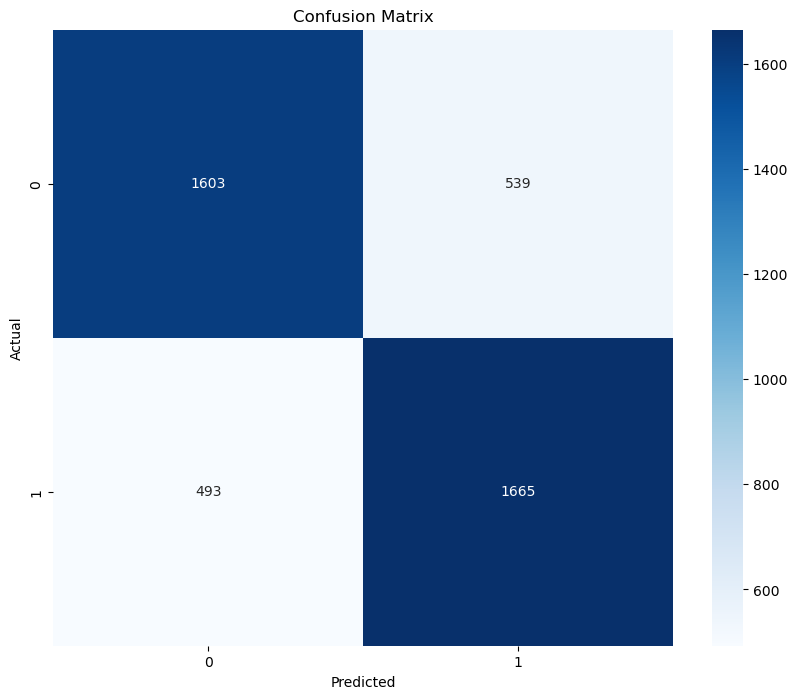

In [170]:
# View a heatmap of the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [171]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.76      0.75      0.76      2142
        True       0.76      0.77      0.76      2158

    accuracy                           0.76      4300
   macro avg       0.76      0.76      0.76      4300
weighted avg       0.76      0.76      0.76      4300



In [172]:
# Show the model's accuracy, precision, recall, and F1 score
from sklearn.metrics import precision_score, recall_score, f1_score
print(f'Accuracy: {accuracy_score(y_test, predictions)}')
print(f'Precision: {precision_score(y_test, predictions)}')
print(f'Recall: {recall_score(y_test, predictions)}')
print(f'F1 Score: {f1_score(y_test, predictions)}')

Accuracy: 0.76
Precision: 0.7554446460980037
Recall: 0.7715477293790547
F1 Score: 0.7634112792297113


In [173]:
# view the feature weights
feature_importance = classifier.coef_[0]
print(feature_importance)

[ 0.01703184  0.03016241  0.07259359 -0.06322318  0.9126966   0.22394454
 -0.11422167  0.42938958  0.12707964  0.42477265  0.05543511  0.06483755
  0.09434541  0.02709957  0.20563792  0.02203137 -0.01399806  0.58779048
  0.46044705  0.4982405   0.21803418  0.06236015  0.1117172  -0.02435835]


In [174]:
# Define the feature names
feature_names = X.columns.tolist()

# View the two largest and two smallest feature weights for true positive predictions
weights = logistic_model.coef_[0]
pairs = list(zip(weights, feature_names))
pairs.sort(key=lambda x: x[0])
print("Largest weights for true positive predictions:")
for pair in pairs[-2:]:
    print(pair)
print("\nSmallest weights for true positive predictions:")
for pair in pairs[:2]:
    print(pair)

Largest weights for true positive predictions:
(0.5877904800417002, 'GenHealth_Fair')
(0.9126966005002406, 'AgeCategoryOrdinal')

Smallest weights for true positive predictions:
(-0.1142216721532135, 'AlcoholDrinking_Yes')
(-0.0632231757571508, 'SleepTime')


# Model Analysis
The linear regression model for 2022 data scored within a percentage point of the model applied to the 2020 data. This suggests that the model is working properly, as a dramatic difference in performanc would suggest coding, fitting or balancing errors. Similar to the 2020 model analysis, the model does not predict heart disease with a level of accuracy that would be acceptable in medical diagnosis. 